<a href="https://colab.research.google.com/github/TeresaCristina/cross-stitch-python/blob/main/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Libraries**



In [29]:
! pip install Pillow #running in bash
! pip install colormap
! pip install easydev

In [34]:
from PIL import Image, ImageEnhance
 #library for image processing
from IPython.display import display
from colormap import rgb2hex, hex2rgb
import math
import numpy as np
import matplotlib.pyplot as plt

**RGB Database**

In [31]:
# Test database with reduced options
database_rgb = [["Ecru","Ecru",240,234,218],
["B5200","Snow White",255,255,255],
["White","White",252,251,248],
[150,"Dusty Rose Ult Vy Dk",171,2,73],
[151,"Dusty Rose Vry Lt",240,206,212],
[152,"Shell Pink Med Light",226,160,153],
[153,"Violet Very Light",230,204,217],
[154,"Grape Very Dark",87,36,51],
[155,"Blue Violet Med Dark",152,145,182],
[156,"Blue Violet Med Lt",163,174,209],
[157,"Cornflower Blue Vy Lt",187,195,217],
[158,"Cornflower Blu M V D",76,82,110],
[159,"Blue Gray Light",199,202,215],
[160,"Blue Gray Medium",153,159,183],
[161,"Blue Gray",120,128,164],
[162,"Blue Ultra Very Light",219,236,245],
[163,"Celadon Green Md",77,131,97],
[164,"Forest Green Lt",200,216,184],
[165,"Moss Green Vy Lt",239,244,164],
[166,"Moss Green Md Lt",192,200,64],
[167,"Yellow Beige V Dk",167,124,73],
[168,"Pewter Very Light",209,209,209],
[169,"Pewter Light",132,132,132],
[208,"Lavender Very Dark",131,91,139],
[209,"Lavender Dark",163,123,167],
[210,"Lavender Medium",195,159,195],
[211,"Lavender Light",227,203,227],
[221,"Shell Pink Vy Dk",136,62,67],
[223,"Shell Pink Light",204,132,124],
[224,"Shell Pink Very Light",235,183,175],
[225,"Shell Pink Ult Vy Lt",255,223,213],
[300,"Mahogany Vy Dk",111,47,0],
[301,"Mahogany Med",179,95,43],
[304,"Red Medium",183,31,51],
[307,"Lemon",253,237,84],
[309,"Rose Dark",86,74,74],
[310,"Black",0,0,0],
[311,"Wedgewood Ult VyDk",28,80,102],
[312,"Baby Blue Very Dark",53,102,139],
[315,"Antique Mauve Md Dk",129,73,82],
[316,"Antique Mauve Med",183,115,127],
[317,"Pewter Gray",108,108,108],
[318,"Steel Gray Lt",171,171,171],
[319,"Pistachio Grn Vy Dk",32,95,46],
[320,"Pistachio Green Med",105,136,90],
[321,"Red",199,43,59],
[322,"Baby Blue Dark",90,143,184],
[326,"Rose Very Dark",179,59,75],
[327,"Violet Dark",99,54,102],
[333,"Blue Violet Very Dark",92,84,120],
[334,"Baby Blue Medium",115,159,193],
[335,"Rose",238,84,110],
[336,"Navy Blue",37,59,115],
[340,"Blue Violet Medium",173,167,199],
[341,"Blue Violet Light",183,191,221],
[347,"Salmon Very Dark",191,45,45],
[349,"Coral Dark",210,16,53],
[350,"Coral Medium",224,72,72],
[351,"Coral",233,106,103],
[352,"Coral Light",253,156,151],
[353,"Peach",254,215,204],
[355,"Terra Cotta Dark",152,68,54],
[356,"Terra Cotta Med",197,106,91],
[367,"Pistachio Green Dk",97,122,82],
[368,"Pistachio Green Lt",166,194,152],
[369,"Pistachio Green Vy Lt",215,237,204],
[370,"Mustard Medium",184,157,100],
[371,"Mustard",191,166,113],
[372,"Mustard Lt",204,183,132],
[400,"Mahogany Dark",143,67,15],
[402,"Mahogany Vy Lt",247,167,119],
[407,"Desert Sand Med",187,129,97],
[413,"Pewter Gray Dark",86,86,86],
[414,"Steel Gray Dk",140,140,140],
[415,"Pearl Gray",211,211,214],
[420,"Hazelnut Brown Dk",160,112,66],
[422,"Hazelnut Brown Lt",198,159,123],
[433,"Brown Med",122,69,31],
[434,"Brown Light",152,94,51],
[435,"Brown Very Light",184,119,72],
[436,"Tan",203,144,81],
[437,"Tan Light",228,187,142],
[444,"Lemon Dark",255,214,0],
[445,"Lemon Light",255,251,139],
[451,"Shell Gray Dark",145,123,115],
[452,"Shell Gray Med",192,179,174],
[453,"Shell Gray Light",215,206,203],
[469,"Avocado Green",114,132,60],
[470,"Avocado Grn Lt",148,171,79],
[471,"Avocado Grn V Lt",174,191,121],
[472,"Avocado Grn U Lt",216,228,152],
[498,"Red Dark",167,19,43],
[500,"Blue Green Vy Dk",4,77,51],
[501,"Blue Green Dark",57,111,82],
[502,"Blue Green",91,144,113],
[503,"Blue Green Med",123,172,148],
[504,"Blue Green Vy Lt",196,222,204],
[505,"Jade Green",51,131,98],
[517,"Wedgewood Dark",59,118,143],
[518,"Wedgewood Light",79,147,167],
[519,"Sky Blue",126,177,200],
[520,"Fern Green Dark",102,109,79],
[522,"Fern Green",150,158,126],
[523,"Fern Green Lt",171,177,151],
[524,"Fern Green Vy Lt",196,205,172],
[535,"Ash Gray Vy Lt",99,100,88],
[543,"Beige Brown Ult Vy Lt",242,227,206],
[550,"Violet Very Dark",92,24,78],
[552,"Violet  Medium",128,58,107],
[553,"Violet",163,99,139],
[554,"Violet Light",219,179,203],
[561,"Celadon Green VD",44,106,69],
[562,"Jade Medium",83,151,106],
[563,"Jade Light",143,192,152],
[564,"Jade Very Light",167,205,175],
[580,"Moss Green Dk",136,141,51],
[581,"Moss Green",167,174,56],
[597,"Turquoise",91,163,179],
[598,"Turquoise Light",144,195,204],
[600,"Cranberry Very Dark",205,47,99],
[601,"Cranberry Dark",209,40,106],
[602,"Cranberry Medium",226,72,116],
[603,"Cranberry",255,164,190],
[604,"Cranberry Light",255,176,190],
[605,"Cranberry Very Light",255,192,205],
[606,"Orange-Red Bright",250,50,3],
[608,"Burnt Orange Bright",253,93,53],
[610,"Drab Brown Dk",121,96,71],
[611,"Drab Brown",150,118,86],
[612,"Drab Brown Lt",188,154,120],
[613,"Drab Brown V Lt",220,196,170],
[632,"Desert Sand Ult Vy Dk",135,85,57],
[640,"Beige Gray Vy Dk",133,123,97],
[642,"Beige Gray Dark",164,152,120],
[644,"Beige Gray Med",221,216,203],
[645,"Beaver Gray Vy Dk",110,101,92],
[646,"Beaver Gray Dk",135,125,115],
[647,"Beaver Gray Med",176,166,156],
[648,"Beaver Gray Lt",188,180,172],
[666,"Bright Red",227,29,66],
[676,"Old Gold Lt",229,206,151],
[677,"Old Gold Vy Lt",245,236,203],
[680,"Old Gold Dark",188,141,14],
[699,"Green",5,101,23],
[700,"Green Bright",7,115,27],
[701,"Green Light",63,143,41],
[702,"Kelly Green",71,167,47],
[703,"Chartreuse",123,181,71],
[704,"Chartreuse Bright",158,207,52],
[712,"Cream",255,251,239],
[718,"Plum",156,36,98],
[720,"Orange Spice Dark",229,92,31],
[721,"Orange Spice Med",242,120,66],
[722,"Orange Spice Light",247,151,111],
[725,"Topaz Med Lt",255,200,64],
[726,"Topaz Light",253,215,85],
[727,"Topaz Vy Lt",255,241,175],
[728,"Topaz",228,180,104],
[729,"Old Gold Medium",208,165,62],
[730,"Olive Green V Dk",130,123,48],
[731,"Olive Green Dk",147,139,55],
[732,"Olive Green",148,140,54],
[733,"Olive Green Md",188,179,76],
[734,"Olive Green Lt",199,192,119],
[738,"Tan Very Light",236,204,158],
[739,"Tan Ult Vy Lt",248,228,200],
[740,"Tangerine",255,139,0],
[741,"Tangerine Med",255,163,43],
[742,"Tangerine Light",255,191,87],
[743,"Yellow Med",254,211,118],
[744,"Yellow Pale",255,231,147],
[745,"Yellow Pale Light",255,233,173],
[746,"Off White",252,252,238],
[747,"Peacock Blue Vy Lt",229,252,253],
[754,"Peach Light",247,203,191],
[758,"Terra Cotta Vy Lt",238,170,155],
[760,"Salmon",245,173,173],
[761,"Salmon Light",255,201,201],
[762,"Pearl Gray Vy Lt",236,236,236],
[772,"Yellow Green Vy Lt",228,236,212],
[775,"Baby Blue Very Light",217,235,241],
[776,"Pink Medium",252,176,185],
[777,"Raspberry Very Dark",145,53,70],
[778,"Antique Mauve Vy Lt",223,179,187],
[779,"Cocoa Dark",98,75,69],
[780,"Topaz Ultra Vy Dk",148,99,26],
[781,"Topaz Very Dark",162,109,32],
[782,"Topaz Dark",174,119,32],
[783,"Topaz Medium",206,145,36],
[791,"Cornflower Blue V D",70,69,99],
[792,"Cornflower Blue Dark",85,91,123],
[793,"Cornflower Blue Med",112,125,162],
[794,"Cornflower Blue Light",143,156,193],
[796,"Royal Blue Dark",17,65,109],
[797,"Royal Blue",19,71,125],
[798,"Delft Blue Dark",70,106,142],
[799,"Delft Blue Medium",116,142,182],
[800,"Delft Blue Pale",192,204,222],
[801,"Coffee Brown Dk",101,57,25],
[803,"Baby Blue Ult Vy Dk",44,89,124],
[806,"Peacock Blue Dark",61,149,165],
[807,"Peacock Blue",100,171,186],
[809,"Delft Blue",148,168,198],
[813,"Blue Light",161,194,215],
[814,"Garnet Dark",123,0,27],
[815,"Garnet Medium",135,7,31],
[816,"Garnet",151,11,35],
[817,"Coral Red Very Dark",187,5,31],
[818,"Baby Pink",255,223,217],
[819,"Baby Pink Light",255,238,235],
[820,"Royal Blue Very Dark",14,54,92],
[822,"Beige Gray Light",231,226,211],
[823,"Navy Blue Dark",33,48,99],
[824,"Blue Very Dark",57,105,135],
[825,"Blue Dark",71,129,165],
[826,"Blue Medium",107,158,191],
[827,"Blue Very Light",189,221,237],
[828,"Sky Blue Vy Lt",197,232,237],
[829,"Golden Olive Vy Dk",126,107,66],
[830,"Golden Olive Dk",141,120,75],
[831,"Golden Olive Md",170,143,86],
[832,"Golden Olive",189,155,81],
[833,"Golden Olive Lt",200,171,108],
[834,"Golden Olive Vy Lt",219,190,127],
[838,"Beige Brown Vy Dk",89,73,55],
[839,"Beige Brown Dk",103,85,65],
[840,"Beige Brown Med",154,124,92],
[841,"Beige Brown Lt",182,155,126],
[842,"Beige Brown Vy Lt",209,186,161],
[844,"Beaver Gray Ult Dk",72,72,72],
[869,"Hazelnut Brown V Dk",131,94,57],
[890,"Pistachio Grn Ult V D",23,73,35],
[891,"Carnation Dark",255,87,115],
[892,"Carnation Medium",255,121,140],
[893,"Carnation Light",252,144,162],
[894,"Carnation Very Light",255,178,187],
[895,"Hunter Green Vy Dk",27,83,0],
[898,"Coffee Brown Vy Dk",73,42,19],
[899,"Rose Medium",242,118,136],
[900,"Burnt Orange Dark",209,88,7],
[902,"Garnet Very Dark",130,38,55],
[904,"Parrot Green V Dk",85,120,34],
[905,"Parrot Green Dk",98,138,40],
[906,"Parrot Green Md",127,179,53],
[907,"Parrot Green Lt",199,230,102],
[909,"Emerald Green Vy Dk",21,111,73],
[910,"Emerald Green Dark",24,126,86],
[911,"Emerald Green Med",24,144,101],
[912,"Emerald Green Lt",27,157,107],
[913,"Nile Green Med",109,171,119],
[915,"Plum Dark",130,0,67],
[917,"Plum Medium",155,19,89],
[918,"Red?Copper Dark",130,52,10],
[919,"Red?Copper",166,69,16],
[920,"Copper Med",172,84,20],
[921,"Copper",198,98,24],
[922,"Copper Light",226,115,35],
[924,"Gray Green Vy Dark",86,106,106],
[926,"Gray Green Med",152,174,174],
[927,"Gray Green Light",189,203,203],
[928,"Gray Green Vy Lt",221,227,227],
[930,"Antique Blue Dark",69,92,113],
[931,"Antique Blue Medium",106,133,158],
[932,"Antique Blue Light",162,181,198],
[934,"Avocado Grn Black",49,57,25],
[935,"Avocado Green Dk",66,77,33],
[936,"Avocado Grn V Dk",76,88,38],
[937,"Avocado Green Md",98,113,51],
[938,"Coffee Brown Ult Dk",54,31,14],
[939,"Navy Blue Very Dark",27,40,83],
[943,"Green Bright Md",61,147,132],
[945,"Tawny",251,213,187],
[946,"Burnt Orange Med",235,99,7],
[947,"Burnt Orange",255,123,77],
[948,"Peach Very Light",254,231,218],
[950,"Desert Sand Light",238,211,196],
[951,"Tawny Light",255,226,207],
[954,"Nile Green",136,186,145],
[955,"Nile Green Light",162,214,173],
[956,"Geranium",255,145,145],
[957,"Geranium Pale",253,181,181],
[958,"Sea Green Dark",62,182,161],
[959,"Sea Green Med",89,199,180],
[961,"Dusty Rose Dark",207,115,115],
[962,"Dusty Rose Medium",230,138,138],
[963,"Dusty Rose Ult Vy Lt",255,215,215],
[964,"Sea Green Light",169,226,216],
[966,"Jade Ultra Vy Lt",185,215,192],
[967,"Apricot Very Light",255,222,213],
[970,"Pumpkin Light",247,139,19],
[971,"Pumpkin",246,127,0],
[972,"Canary Deep",255,181,21],
[973,"Canary Bright",255,227,0],
[975,"Golden Brown Dk",145,79,18],
[976,"Golden Brown Med",194,129,66],
[977,"Golden Brown Light",220,156,86],
[986,"Forest Green Vy Dk",64,82,48],
[987,"Forest Green Dk",88,113,65],
[988,"Forest Green Med",115,139,91],
[989,"Forest Green ",141,166,117],
[991,"Aquamarine Dk",71,123,110],
[992,"Aquamarine Lt",111,174,159],
[993,"Aquamarine Vy Lt",144,192,180],
[995,"Electric Blue Dark",38,150,182],
[996,"Electric Blue Medium",48,194,236],
[3011,"Khaki Green Dk",137,138,88],
[3012,"Khaki Green Md",166,167,93],
[3013,"Khaki Green Lt",185,185,130],
[3021,"Brown Gray Vy Dk",79,75,65],
[3022,"Brown Gray Med",142,144,120],
[3023,"Brown Gray Light",177,170,151],
[3024,"Brown Gray Vy Lt",235,234,231],
[3031,"Mocha Brown Vy Dk",75,60,42],
[3032,"Mocha Brown Med",179,159,139],
[3033,"Mocha Brown Vy Lt",227,216,204],
[3041,"Antique Violet Medium",149,111,124],
[3042,"Antique Violet Light",183,157,167],
[3045,"Yellow Beige Dk",188,150,106],
[3046,"Yellow Beige Md",216,188,154],
[3047,"Yellow Beige Lt",231,214,193],
[3051,"Green Gray Dk",95,102,72],
[3052,"Green Gray Md",136,146,104],
[3053,"Green Gray",156,164,130],
[3064,"Desert Sand",196,142,112],
[3072,"Beaver Gray Vy Lt",230,232,232],
[3078,"Golden Yellow Vy Lt",253,249,205],
[3325,"Baby Blue Light",184,210,230],
[3326,"Rose Light",251,173,180],
[3328,"Salmon Dark",227,109,109],
[3340,"Apricot Med",255,131,111],
[3341,"Apricot",252,171,152],
[3345,"Hunter Green Dk",27,89,21],
[3346,"Hunter Green",64,106,58],
[3347,"Yellow Green Med",113,147,92],
[3348,"Yellow Green Lt",204,217,177],
[3350,"Dusty Rose Ultra Dark",188,67,101],
[3354,"Dusty Rose Light",228,166,172],
[3362,"Pine Green Dk",94,107,71],
[3363,"Pine Green Md",114,130,86],
[3364,"Pine Green",131,151,95],
[3371,"Black Brown",30,17,8],
[3607,"Plum Light",197,73,137],
[3608,"Plum Very Light",234,156,196],
[3609,"Plum Ultra Light",244,174,213],
[3685,"Mauve Very Dark",136,21,49],
[3687,"Mauve",201,107,112],
[3688,"Mauve Medium",231,169,172],
[3689,"Mauve Light",251,191,194],
[3705,"Melon Dark",255,121,146],
[3706,"Melon Medium",255,173,188],
[3708,"Melon Light",255,203,213],
[3712,"Salmon Medium",241,135,135],
[3713,"Salmon Very Light",255,226,226],
[3716,"Dusty Rose Med Vy Lt",255,189,189],
[3721,"Shell Pink Dark",161,75,81],
[3722,"Shell Pink Med",188,108,100],
[3726,"Antique Mauve Dark",155,91,102],
[3727,"Antique Mauve Light",219,169,178],
[3731,"Dusty Rose Very Dark",218,103,131],
[3733,"Dusty Rose",232,135,155],
[3740,"Antique Violet Dark",120,87,98],
[3743,"Antique Violet Vy Lt",215,203,211],
[3746,"Blue Violet Dark",119,107,152],
[3747,"Blue Violet Vy Lt",211,215,237],
[3750,"Antique Blue Very Dk",56,76,94],
[3752,"Antique Blue Very Lt",199,209,219],
[3753,"Antique Blue Ult Vy Lt",219,226,233],
[3755,"Baby Blue",147,180,206],
[3756,"Baby Blue Ult Vy Lt",238,252,252],
[3760,"Wedgewood Med",62,133,162],
[3761,"Sky Blue Light",172,216,226],
[3765,"Peacock Blue Vy Dk",52,127,140],
[3766,"Peacock Blue Light",153,207,217],
[3768,"Gray Green Dark",101,127,127],
[3770,"Tawny Vy Light",255,238,227],
[3771,"Terra Cotta Ult Vy Lt",244,187,169],
[3772,"Desert Sand Vy Dk",160,108,80],
[3773,"Desert Sand Dark",182,117,82],
[3774,"Desert Sand Vy Lt",243,225,215],
[3776,"Mahogany Light",207,121,57],
[3777,"Terra Cotta Vy Dk",134,48,34],
[3778,"Terra Cotta Light",217,137,120],
[3779,"Rosewood Ult Vy Lt",248,202,200],
[3781,"Mocha Brown Dk",107,87,67],
[3782,"Mocha Brown Lt",210,188,166],
[3787,"Brown Gray Dark",98,93,80],
[3790,"Beige Gray Ult Dk",127,106,85],
[3799,"Pewter Gray Vy Dk",66,66,66],
[3801,"Melon Very Dark",231,73,103],
[3802,"Antique Mauve Vy Dk",113,65,73],
[3803,"Mauve Dark",171,51,87],
[3804,"Cyclamen Pink Dark",224,40,118],
[3805,"Cyclamen Pink",243,71,139],
[3806,"Cyclamen Pink Light",255,140,174],
[3807,"Cornflower Blue",96,103,140],
[3808,"Turquoise Ult Vy Dk",54,105,112],
[3809,"Turquoise Vy Dark",63,124,133],
[3810,"Turquoise Dark",72,142,154],
[3811,"Turquoise Very Light",188,227,230],
[3812,"Sea Green Vy Dk",47,140,132],
[3813,"Blue Green Lt",178,212,189],
[3814,"Aquamarine",80,139,125],
[3815,"Celadon Green Dk",71,119,89],
[3816,"Celadon Green",101,165,125],
[3817,"Celadon Green Lt",153,195,170],
[3818,"Emerald Grn Ult V Dk",17,90,59],
[3819,"Moss Green Lt",224,232,104],
[3820,"Straw Dark",223,182,95],
[3821,"Straw",243,206,117],
[3822,"Straw Light",246,220,152],
[3823,"Yellow Ultra Pale",255,253,227],
[3824,"Apricot Light",254,205,194],
[3825,"Pumpkin Pale",253,189,150],
[3826,"Golden Brown",173,114,57],
[3827,"Golden Brown Pale",247,187,119],
[3828,"Hazelnut Brown",183,139,97],
[3829,"Old Gold Vy Dark",169,130,4],
[3830,"Terra Cotta",185,85,68],
[3831,"Raspberry Dark",179,47,72],
[3832,"Raspberry Medium",219,85,110],
[3833,"Raspberry Light",234,134,153],
[3834,"Grape Dark",114,55,93],
[3835,"Grape Medium",148,96,131],
[3836,"Grape Light",186,145,170],
[3837,"Lavender Ultra Dark",108,58,110],
[3838,"Lavender Blue Dark",92,114,148],
[3839,"Lavender Blue Med",123,142,171],
[3840,"Lavender Blue Light",176,192,218],
[3841,"Baby Blue Pale",205,223,237],
[3842,"Wedgewood Vry Dk",50,102,124],
[3843,"Electric Blue",20,170,208],
[3844,"Turquoise Bright Dark",18,174,186],
[3845,"Turquoise Bright Med",4,196,202],
[3846,"Turquoise Bright Light",6,227,230],
[3847,"Teal Green Dark",52,125,117],
[3848,"Teal Green Med",85,147,146],
[3849,"Teal Green Light",82,179,164],
[3850,"Green Bright Dk",55,132,119],
[3851,"Green Bright Lt",73,179,161],
[3852,"Straw Very Dark",205,157,55],
[3853,"Autumn Gold Dk",242,151,70],
[3854,"Autumn Gold Med",242,175,104],
[3855,"Autumn Gold Lt",250,211,150],
[3856,"Mahogany Ult Vy Lt",255,211,181],
[3857,"Rosewood Dark",104,37,26],
[3858,"Rosewood Med",150,74,63],
[3859,"Rosewood Light",186,139,124],
[3860,"Cocoa",125,93,87],
[3861,"Cocoa Light",166,136,129],
[3862,"Mocha Beige Dark",138,110,78],
[3863,"Mocha Beige Med",164,131,92],
[3864,"Mocha Beige Light",203,182,156],
[3865,"Winter White",249,247,241],
[3866,"Mocha Brn Ult Vy Lt",250,246,240]]

database_range = len(database_rgb) 

**Resize Image**

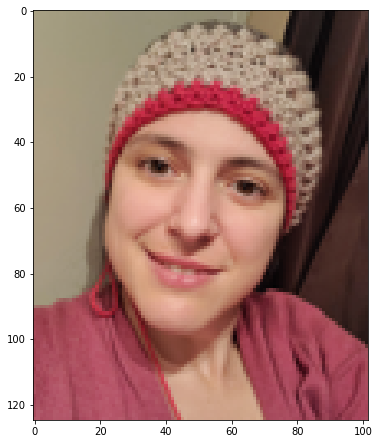

In [47]:
# Original picture
profile_image = Image.open("profile_etsy.png")
original_width, original_height = profile_image.size

#display(profile_image)

# Resized picture
resized_factor = 0.15
width = round(original_width*resized_factor)
height = round(original_height*resized_factor)
profile_image_resized = profile_image.resize((width, height))  # resize image 

#display(profile_image_resized)
plt.figure(figsize=(6,10))
plt.imshow(profile_image_resized)

**Image Manipulation**

In [ ]:
enhancer = ImageEnhance.Contrast(profile_image_resized)
factor = 1.5 #increase contrast
contrast_profile_image = enhancer.enhance(factor)
display(contrast_profile_image)

**Pixels**

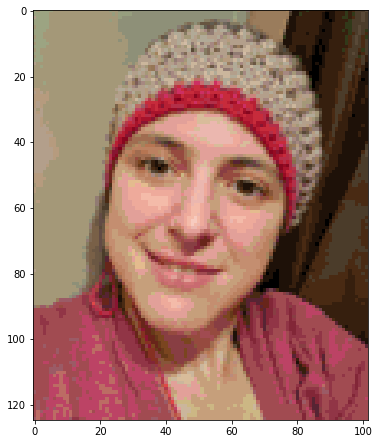

In [48]:
# Pixeleted image
#resized_pixel_map = contrast_profile_image.load()
resized_pixel_map = profile_image_resized.load()

# General Functions
def diff(number_one, number_two):
  return number_one - number_two

def pow(number, index=2): 
  return (number)**index

def error_margin(database, original_value):
  first = pow(diff(database[2], original_value[0]))
  second = pow(diff(database[3], original_value[1]))
  third = pow(diff(database[4], original_value[2]))
  return (first + second + third)

def findColorMatch(d_range, t_database, p_value):
  found_color = False
  for z in range(d_range):
    if p_value == t_database[z]:
        found_color = True
        break
  return found_color
  
# Change pixels to match database
def findFlossNumber(p_width, p_height, d_range, t_database, p_map):
  for x in range(p_width):
    for y in range(p_height):
      original_pixel = p_map[x,y]
      if findColorMatch(d_range, t_database, original_pixel) == False:
        diff = 3*(255**2) + 1
        index = 0
        for z in range(d_range):
          new_diff = error_margin(t_database[z], original_pixel)
          if new_diff < diff:
            diff = new_diff
            index = z
        p_map[x,y]  = (t_database[index][2],t_database[index][3], t_database[index][4]) 
      

findFlossNumber(width, height, database_range, database_rgb, resized_pixel_map)

#display(profile_image_resized)
plt.figure(figsize=(6,10))
plt.imshow(profile_image_resized)